In [23]:
# !pip install seaborn

In [24]:
import pandas as pd
import seaborn as sns
import numpy as np

In [25]:
# data_old = pd.read_csv('./Iter2/FINAL_HWM_Opt.csv')
# data_old

In [26]:
# data_b = pd.read_csv('./Iter3/HWM_Opt_Final_CROP.csv')
# data_b

In [27]:
file = 'H:/My Drive/CODE/HAND/HWM/Iter4_USGS/USGS_Opt.csv'
data = pd.read_csv(file)

data.describe()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,site_no,194264_00065,Stream_H_m,OID_,Field1,REACHCODE,...,Offset,FLComID,POINT_X,POINT_Y,POINT_Z,POINT_M,COMID,Predict_Stream_H_m,roughness,RMSE
count,133.00000,133.000000,133.000000,133.000000,1.330000e+02,133.000000,133.000000,133.000000,133.000000,1.330000e+02,...,133.0,1.330000e+02,133.000000,133.000000,133.0,133.000000,1.330000e+02,133.000000,133.000000,1.330000e+02
mean,66.00000,66.466165,81.082707,75.721805,1.412478e+06,12.826241,3.909438,516.624060,2191.075188,2.034211e+12,...,0.0,1.377986e+07,-74.580226,40.524775,0.0,50.570885,1.377990e+07,3.304457,0.116435,7.593744e-01
std,38.53786,38.971347,44.044923,45.994953,2.928921e+04,11.466522,3.494996,216.197322,276.312861,4.955946e+09,...,0.0,8.026669e+07,0.332386,0.460121,0.0,31.109809,8.026668e+07,2.048543,0.077420,2.719521e+00
min,0.00000,0.000000,0.000000,0.000000,1.377000e+06,2.540000,0.774192,42.000000,1458.000000,2.030000e+12,...,0.0,2.583309e+06,-75.329738,39.306654,0.0,0.003220,2.583309e+06,0.519754,0.005000,2.230000e-08
25%,33.00000,33.000000,51.000000,34.000000,1.391000e+06,7.290000,2.221992,377.000000,2017.000000,2.030000e+12,...,0.0,4.495818e+06,-74.820477,40.269814,0.0,24.312250,4.499256e+06,1.920240,0.036186,1.370000e-07
50%,66.00000,66.000000,84.000000,75.000000,1.403060e+06,10.420000,3.176016,569.000000,2196.000000,2.030000e+12,...,0.0,6.251098e+06,-74.583119,40.622074,0.0,50.480820,6.251098e+06,2.793881,0.125701,9.640000e-07
75%,99.00000,100.000000,118.000000,117.000000,1.440000e+06,15.260000,4.651248,692.000000,2371.000000,2.040000e+12,...,0.0,9.512692e+06,-74.298337,40.890671,0.0,78.128610,9.512692e+06,4.270248,0.200000,8.400889e-01
max,132.00000,133.000000,151.000000,154.000000,1.482500e+06,122.540000,37.350192,853.000000,2775.000000,2.040000e+12,...,0.0,9.320302e+08,-73.988395,41.206744,0.0,99.667700,9.320301e+08,12.771120,0.200000,3.022496e+01


In [28]:
# for catch in data.COMID.unique():
#     subset = data.loc[data.COMID == catch]
#     rmse = ((subset.Stream_H_m - subset.Predict_Stream_H_m) ** 2).mean() ** .5
#     data.rmse.loc[data.COMID == catch] = rmse
# data.to_csv(file[:-4] + '_rmse.csv')

In [29]:
catch = pd.read_csv('H:/My Drive/CODE/HAND/Catchment Data/Catchment_Regression_Data.csv')
catch2 = catch[['CatchId','StreamOrde']]
data = data.merge(catch2, left_on='COMID', right_on='CatchId', how='left')
# data.to_csv(fpath[:-4] + '_ord.csv')

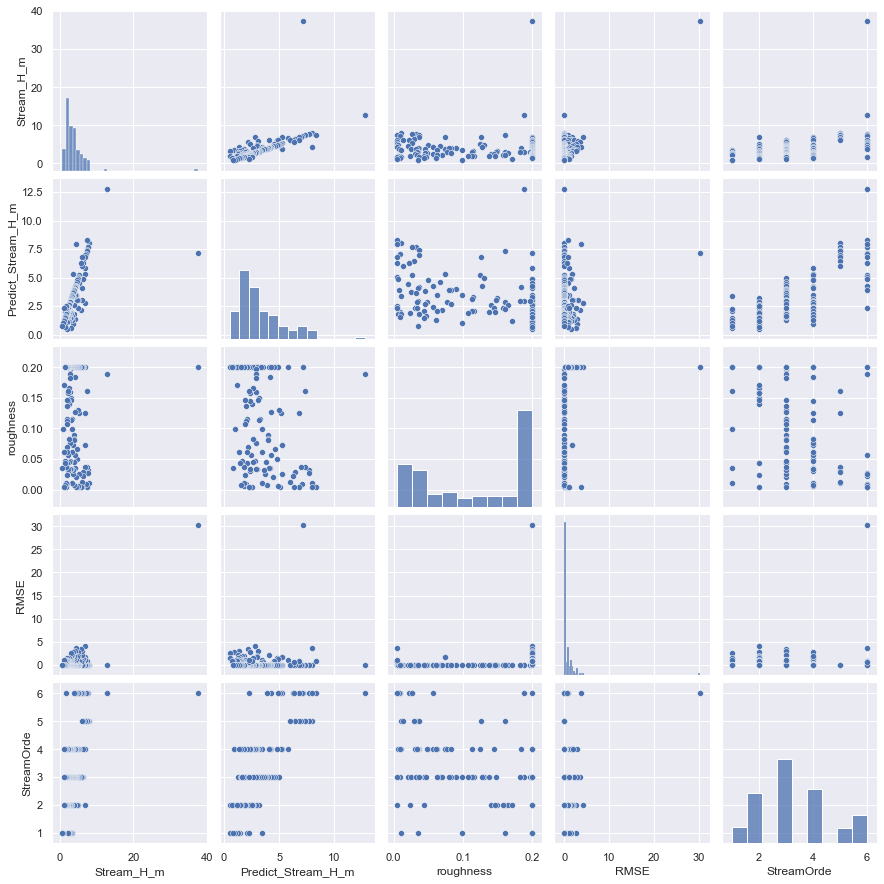

In [30]:
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_theme()
sns_plot = sns.pairplot(data[['Stream_H_m', 'Predict_Stream_H_m', 'roughness', 'RMSE', 'StreamOrde']])
# sns_plot.savefig("output.png")

sns_plot

In [37]:
data = data.loc[data.Stream_H_m < 15]

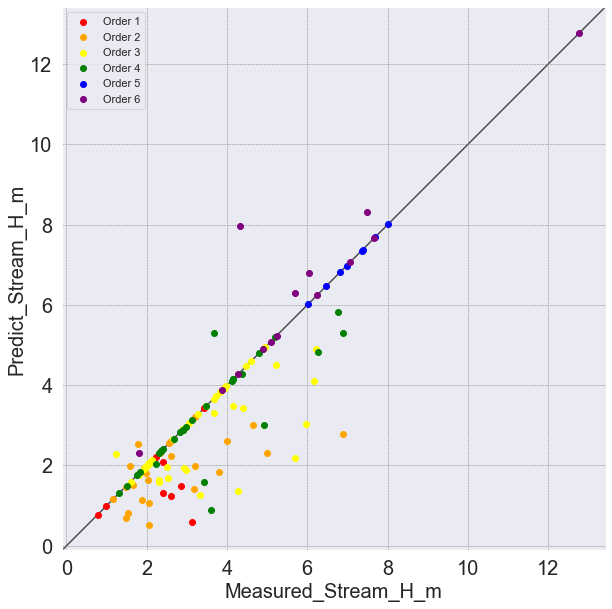

In [38]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('axes', labelsize=20) 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# fig, ax = plt.subplots()
ax.scatter(x=data['Stream_H_m'].loc[data.StreamOrde==1], y=data['Predict_Stream_H_m'].loc[data.StreamOrde==1],label='Order 1',c='red')
ax.scatter(x=data['Stream_H_m'].loc[data.StreamOrde==2], y=data['Predict_Stream_H_m'].loc[data.StreamOrde==2],label='Order 2',c='orange')
ax.scatter(x=data['Stream_H_m'].loc[data.StreamOrde==3], y=data['Predict_Stream_H_m'].loc[data.StreamOrde==3],label='Order 3',c='yellow')
ax.scatter(x=data['Stream_H_m'].loc[data.StreamOrde==4], y=data['Predict_Stream_H_m'].loc[data.StreamOrde==4],label='Order 4',c='green')
ax.scatter(x=data['Stream_H_m'].loc[data.StreamOrde==5], y=data['Predict_Stream_H_m'].loc[data.StreamOrde==5],label='Order 5',c='blue')
ax.scatter(x=data['Stream_H_m'].loc[data.StreamOrde==6], y=data['Predict_Stream_H_m'].loc[data.StreamOrde==6],label='Order 6',c='purple')
ax.legend()
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.xlabel("Measured_Stream_H_m")
plt.ylabel("Predict_Stream_H_m")
plt.grid(color = 'gray', linestyle='--',linewidth = 0.5)
plt.savefig('StreamDepth.png')


In [39]:
rmse = ((data['Stream_H_m'] - data['Predict_Stream_H_m']) ** 2).mean() ** .5
print("\nRMSE = " + str(round(rmse,6)))


RMSE = 1.027614


In [40]:
correlation_matrix = np.corrcoef(data['Stream_H_m'], data['Predict_Stream_H_m'])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared

0.7812013982008605

In [41]:
import scipy
# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(data['Stream_H_m'], data['Predict_Stream_H_m'])
# print(slope, intercept, r_value, p_value, std_err)
scipy.stats.linregress(data['Stream_H_m'], data['Predict_Stream_H_m'])

LinregressResult(slope=0.9313646522279396, intercept=-0.12964965826997732, rvalue=0.8838559827261795, pvalue=9.993790017704366e-45, stderr=0.043230358827550434)

In [42]:
catch = data.drop_duplicates(subset='COMID')
# catch = catch.drop(labels=['SITE_NUM', 'HWM_ID', 'SITE_ID', 'NAME', 'LAT_DD', 'LON_DD', 'HWM_ELEV_ft', \
#         'HWM_ELEV_m','DEM_m','HAND_m','Inun_Depth_m', 'time_file'], axis='columns')
catch

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,agency_cd,site_no,datetime,tz_cd,194264_00065,Stream_H_m,...,POINT_Y,POINT_Z,POINT_M,COMID,time_file,Predict_Stream_H_m,roughness,RMSE,CatchId,StreamOrde
1,1,1,1,1,USGS,1403060,2011-08-28 18:00,EDT,41.90,12.771120,...,40.551601,0,68.90423,9513378,20110828_19,12.771120,0.188120,2.590000e-07,9513378,6.0
2,2,2,2,2,USGS,1400500,2011-08-28 16:00,EDT,26.29,8.013192,...,40.555555,0,89.83748,9513852,20110828_18,8.013193,0.010610,1.110000e-06,9513852,5.0
3,3,3,3,3,USGS,1388500,2011-08-29 01:15,EDT,25.24,7.693152,...,40.969298,0,56.37115,6249470,20110828_16,7.693153,0.031575,5.450000e-07,6249470,5.0
4,4,4,4,4,USGS,1446995,2011-08-29 05:00,EDT,25.15,7.665720,...,40.694496,0,86.53518,2588457,20110830_19,7.665722,0.026794,1.500000e-06,2588457,6.0
5,5,5,5,5,USGS,1457500,2011-08-29 06:30,EDT,24.56,7.485888,...,40.589230,0,82.37427,2588481,20110828_17,8.320222,0.005000,8.343341e-01,2588481,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,128,129,147,149,USGS,1409000,2011-08-28 09:45,EDT,4.32,1.316736,...,39.867962,0,18.62468,9453855,20110828_08,1.316736,0.061568,6.340000e-08,9453855,4.0
129,129,130,148,150,USGS,1396800,2011-08-28 14:30,EDT,4.06,1.237488,...,40.639259,0,0.00322,9512994,20110828_09,2.297540,0.005000,1.060052e+00,9512994,3.0
130,130,131,149,151,USGS,1379773,2011-08-28 19:45,EDT,3.84,1.170432,...,40.959444,0,13.19529,6249510,20110828_13,1.170432,0.170180,2.230000e-08,6249510,2.0
131,131,132,150,153,USGS,1443900,2011-08-28 10:30,EDT,3.22,0.981456,...,40.981147,0,62.34066,2587723,20110828_10,0.981456,0.098805,3.780000e-08,2587723,1.0


In [43]:
print("Order  Avg_H  Avg_rough  Avg_RMSE  COMIDs  Pt_Count")
for order in np.sort(catch.StreamOrde.unique()):
    subset = catch.loc[catch.StreamOrde == order]
    print(f'{order: 3}  {round(subset.Predict_Stream_H_m.mean(),1):5}\
    {round(subset.roughness.mean(),3):6}  {round(subset.RMSE.mean(),2):7} {len(subset.COMID.unique()):7} \
    {round(len(subset),1):7}')

print("Order  Med_H  Med_rough  Med_RMSE  COMIDs  Pt_Count")
for order in np.sort(catch.StreamOrde.unique()):
    subset = catch.loc[catch.StreamOrde == order]
    print(f'{order: 3}    {round(subset.Predict_Stream_H_m.median(),1):5}\
    {round(subset.roughness.median(),3):6}  {round(subset.RMSE.median(),2):7} {len(subset.COMID.unique()):7} \
    {round(len(subset),1):7}')

Order  Avg_H  Avg_rough  Avg_RMSE  COMIDs  Pt_Count
 1.0    1.6     0.145     0.75       9           9
 2.0    1.9     0.168     0.81      26          26
 3.0    2.9     0.129     0.52      45          45
 4.0    3.1     0.097     0.38      28          28
 5.0    7.1     0.055      0.0       8           8
 6.0    6.3     0.027     0.45      14          14
Order  Med_H  Med_rough  Med_RMSE  COMIDs  Pt_Count
 1.0      1.3       0.2     0.34       9           9
 2.0      1.9       0.2     0.54      26          26
 3.0      2.9      0.13      0.0      45          45
 4.0      2.9     0.068      0.0      28          28
 5.0      7.2     0.034      0.0       8           8
 6.0      6.3     0.007      0.0      14          14


In [16]:
catch2 = catch[catch.roughness < 0.299]
catch2 = catch2[catch2.roughness > 0.0051]

In [17]:
print("Order  Avg_H  Avg_rough  Avg_RMSE  COMIDs  Pt_Count")
for order in np.sort(catch2.StreamOrde.unique()):
    subset = catch2.loc[catch2.StreamOrde == order]
    print(f'{order: 3}  {round(subset.Predict_Stream_H_m.mean(),1):5}\
    {round(subset.roughness.mean(),3):6}  {round(subset.RMSE.mean(),2):7}   {len(subset.COMID.unique()):7} \
    {round(len(subset),1):4}')

print("Order  Med_H  Med_rough  Med_RMSE  COMIDs  Pt_Count")
for order in np.sort(catch2.StreamOrde.unique()):
    subset = catch2.loc[catch2.StreamOrde == order]
    print(f'{order: 3}  {round(subset.Predict_Stream_H_m.median(),1):5}\
    {round(subset.roughness.median(),3):6}  {round(subset.RMSE.median(),2):7} {len(subset.COMID.unique()):7} \
    {round(len(subset),1):7}')

Order  Avg_H  Avg_rough  Avg_RMSE  COMIDs  Pt_Count
  1    2.0     0.073      0.0         5        5
  2    2.4     0.134     0.06        13       13
  3    3.2       0.1      0.0        34       34
  4    3.2     0.073     0.07        24       24
  5    7.1     0.031      0.0         8        8
  6    7.0     0.053      0.0         5        5


In [ ]:
catch.describe()

In [ ]:
catch_data1 = pd.read_csv('CatchPointsWithData_DEM.csv')
catch_data1

In [ ]:
catch_data2 = pd.read_csv('CatchPointsWithRunoffC.csv')
catch_data2

In [ ]:
catch2 = catch.merge(catch_data1, on='COMID')
catch2 = catch2.merge(catch_data2, on='COMID')
catch2

In [ ]:
catch3 = catch2.drop_duplicates(subset='COMID')
catch3

In [ ]:
# catch3.to_csv('./Iter6/HWM_Combined_Opt_DEM.csv')

In [ ]:
data_x = pd.read_csv('./Cleaned Hwm/hydrogeo-fulltable-020999.csv')
data_x

In [ ]:
data_x = data_x.drop_duplicates(subset='CatchId')
data_x

In [ ]:
catch4 = catch3.merge(data_x, left_on='COMID', right_on='CatchId')
catch4

In [ ]:
# catch4.to_csv('./Iter6/HWM_Combined_Opt_DEM.csv')